In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
c = pd.read_csv("C:/Users/goutham/Desktop/UT SOuthwestern Medical Center/Data/oasis_cross-sectional.csv")
c.head(5)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [8]:
c.tail(5)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0
435,OAS1_0395_MR2,F,R,26,NaN,NaN,NaN,NaN,1283,0.834,1.368,39.0


In [11]:
l = pd.read_csv("C:/Users/goutham/Desktop/UT SOuthwestern Medical Center/Data/oasis_longitudinal.csv")
l.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [12]:
l.tail(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [13]:
c.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

In [14]:
l.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object

In [15]:
c.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [16]:
l.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [17]:
c.shape

(436, 12)

In [18]:
l.shape

(373, 15)

In [19]:
l['Group'] = l['Group'].replace(['Converted'], ['Demented'])

In [20]:
ccdr_cleaned = c.dropna(subset=['CDR'])

In [21]:
ccdr_cleaned['CDR'] = ccdr_cleaned['CDR'].apply(lambda x: 1 if x >= 0.5 else x)

C:\Users\goutham\AppData\Local\Temp\ipykernel_2544\2580994267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccdr_cleaned['CDR'] = ccdr_cleaned['CDR'].apply(lambda x: 1 if x >= 0.5 else x)


In [22]:
ccdr_cleaned.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ       0
SES       19
MMSE       0
CDR        0
eTIV       0
nWBV       0
ASF        0
Delay    235
dtype: int64

In [23]:
c.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [24]:
l.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [25]:
ccdr_cleaned.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,235.000000,235.000000,216.000000,235.00000,235.000000,235.000000,235.000000,235.000000,0.0
mean,72.344681,3.178723,2.490741,27.06383,0.425532,1459.497872,0.749132,1.216511,NaN
std,12.091369,1.311510,1.120593,3.69687,0.495479,160.368070,0.047906,0.129427,NaN
min,33.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,NaN
25%,66.000000,2.000000,2.000000,26.00000,0.000000,1348.000000,0.713500,1.133500,NaN
50%,73.000000,3.000000,2.000000,29.00000,0.000000,1447.000000,0.747000,1.213000,NaN
75%,81.000000,4.000000,3.000000,30.00000,1.000000,1548.000000,0.784000,1.302000,NaN
max,96.000000,5.000000,5.000000,30.00000,1.000000,1992.000000,0.847000,1.563000,NaN


In [26]:
ldf = l[l.Visit==1]
ldf

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,Demented,1,0,M,R,73,12,NaN,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,Nondemented,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030


In [27]:
ldf.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,150.0,150.0,150.000000,150.000000,142.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,1.0,0.0,75.446667,14.533333,2.492958,27.56000,0.260000,1474.426667,0.736073,1.206333
std,0.0,0.0,7.545421,2.874714,1.128273,2.96847,0.326256,174.683889,0.036458,0.137864
min,1.0,0.0,60.000000,6.000000,1.000000,17.00000,0.000000,1123.000000,0.660000,0.883000
25%,1.0,0.0,70.000000,12.000000,2.000000,26.00000,0.000000,1347.250000,0.710000,1.121000
50%,1.0,0.0,75.000000,14.000000,2.000000,29.00000,0.000000,1453.500000,0.735000,1.207500
75%,1.0,0.0,80.000000,16.000000,3.000000,30.00000,0.500000,1565.250000,0.757750,1.302750
max,1.0,0.0,96.000000,23.000000,5.000000,30.00000,1.000000,1987.000000,0.837000,1.563000


In [28]:
ldf.Group.unique()

array(['Nondemented', 'Demented'], dtype=object)

In [29]:
ldf.Group = ldf.Group.replace(['Converted'], ['Demented'])
ldf.Group.unique()

C:\Users\goutham\AppData\Local\Temp\ipykernel_2544\4243367878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldf.Group = ldf.Group.replace(['Converted'], ['Demented'])


array(['Nondemented', 'Demented'], dtype=object)

In [30]:
ldf.Group=ldf.Group.replace(['Demented', 'Nondemented'], [1,0])
ldf.Group.unique()

C:\Users\goutham\AppData\Local\Temp\ipykernel_2544\2777465459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldf.Group=ldf.Group.replace(['Demented', 'Nondemented'], [1,0])


array([0, 1], dtype=int64)

In [31]:
ldf

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
2,OAS2_0002,OAS2_0002_MR1,1,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
5,OAS2_0004,OAS2_0004_MR1,0,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,0,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
10,OAS2_0007,OAS2_0007_MR1,1,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,OAS2_0182,OAS2_0182_MR1,1,1,0,M,R,73,12,NaN,23.0,0.5,1661,0.698,1.056
361,OAS2_0183,OAS2_0183_MR1,0,1,0,F,R,66,13,2.0,30.0,0.0,1495,0.746,1.174
365,OAS2_0184,OAS2_0184_MR1,1,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
367,OAS2_0185,OAS2_0185_MR1,1,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030


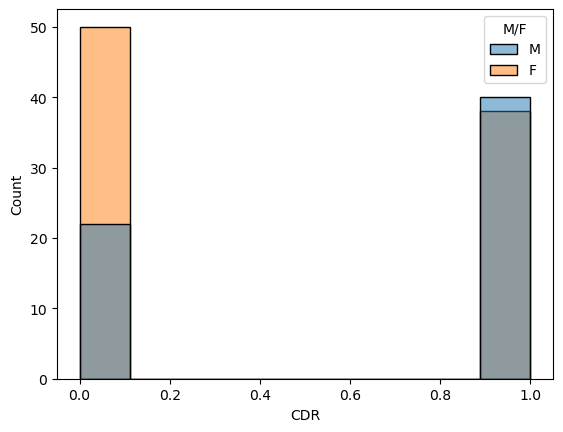

In [32]:
sns.histplot(x='Group',data=ldf,hue='M/F')
plt.xlabel("CDR")
plt.savefig('genderldfcdr.png', dpi=300)

In [33]:
l = l.reset_index(drop=True)
ldf['M/F'] = l['M/F'].replace(['F','M'], [0,1]) 
ldf['Group'] = ldf['Group'].replace(['Converted'], ['Demented'])
ldf['Group'] = ldf['Group'].replace(['Demented', 'Nondemented'], [1,0])
ldf = ldf.drop(['MRI ID', 'Visit', 'Hand'], axis=1) 

In [35]:
# bar drawing
def bar_chart(feature):
    Demented = ldf[ldf['Group']==1][feature].value_counts()
    Nondemented = ldf[ldf['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

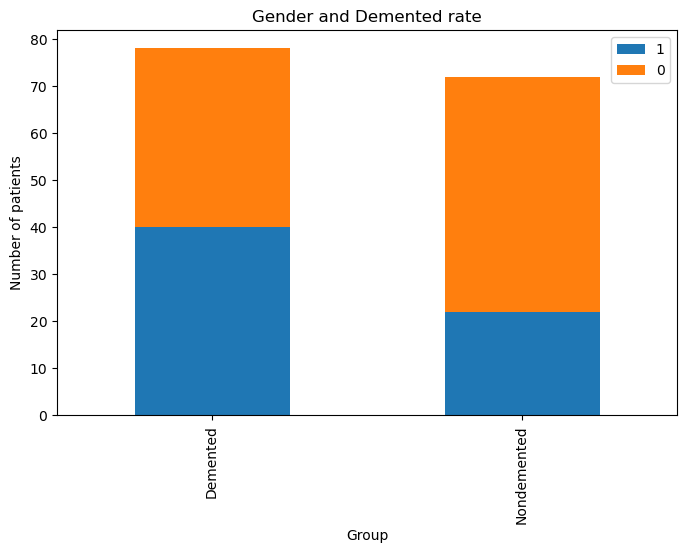

In [36]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

<Axes: xlabel='Age', ylabel='Count'>

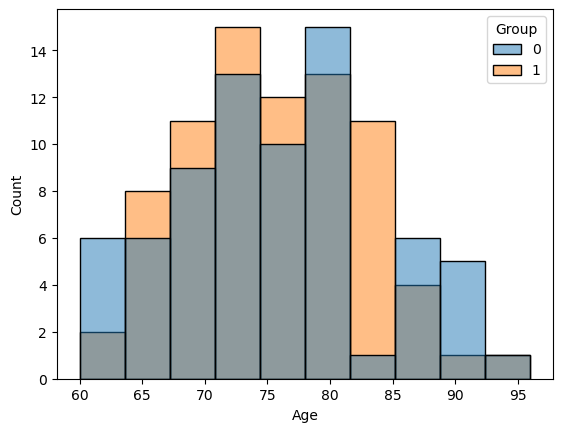

In [37]:
sns.histplot(x='Age',data=ldf,hue='Group')

C:\Users\goutham\AppData\Local\Temp\ipykernel_2544\107771074.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=c.corr()


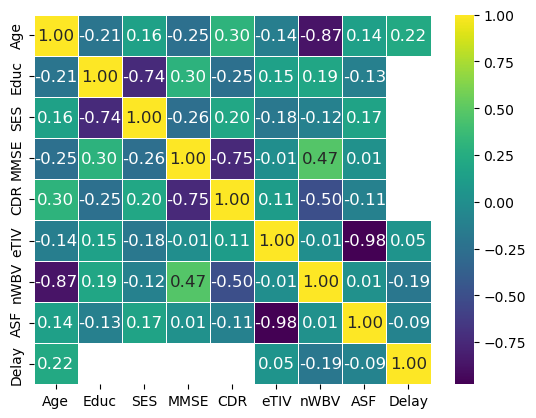

In [39]:
correlation_matrix=c.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="viridis",linewidth=0.5, fmt=".2f",annot_kws={"size": 12})
plt.savefig('18-96.png', dpi=300)

C:\Users\goutham\AppData\Local\Temp\ipykernel_2544\3004734327.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix2=l.corr()


<Figure size 1000x800 with 0 Axes>

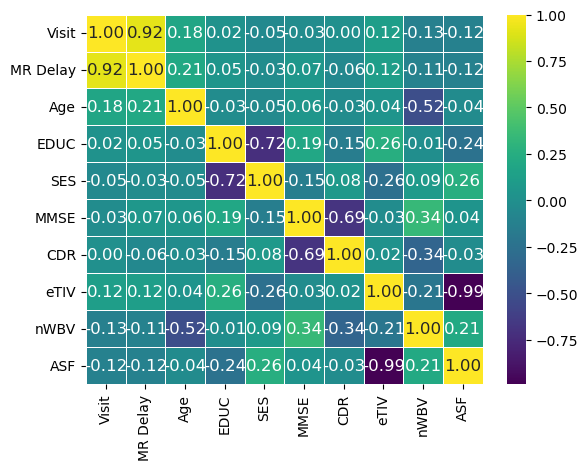

<Figure size 1000x800 with 0 Axes>

In [40]:
correlation_matrix2=l.corr()
sns.heatmap(correlation_matrix2, annot=True, cmap="viridis",linewidth=0.5, fmt=".2f",annot_kws={"size": 12})
plt.figure(figsize=(10, 8))

C:\Users\goutham\AppData\Local\Temp\ipykernel_2544\1705021076.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix3=ldf.corr()


<Axes: >

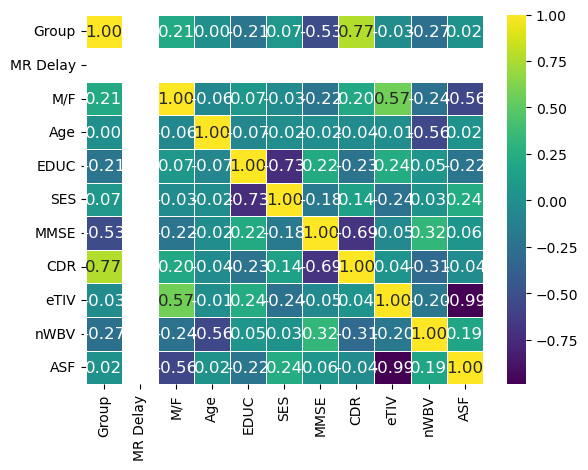

In [42]:
correlation_matrix3=ldf.corr()
sns.heatmap(correlation_matrix3, annot=True, cmap="viridis",linewidth=0.5, fmt=".2f",annot_kws={"size": 12})

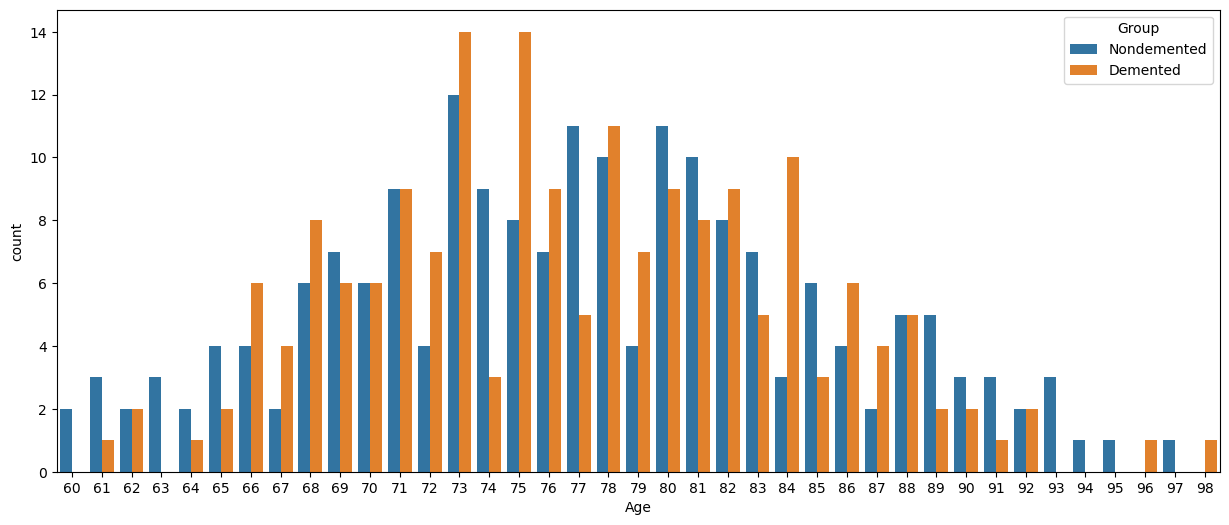

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(x ='Age',hue='Group',data = l)
plt.savefig('longitudinal_by_age.png', dpi=300)

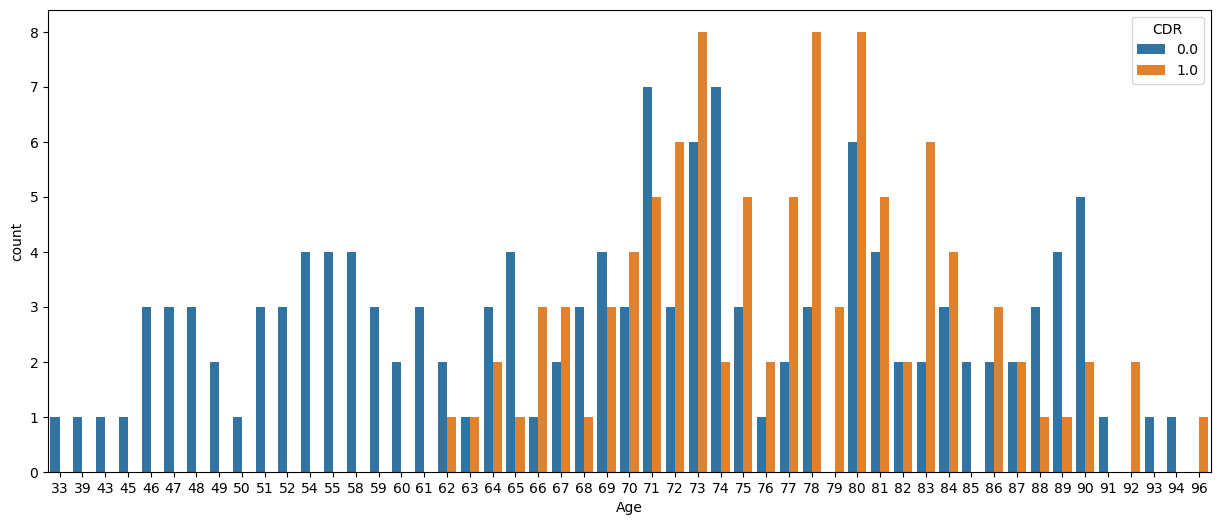

In [44]:
plt.figure(figsize=(15,6))
sns.countplot(x ='Age',hue='CDR',data = ccdr_cleaned)
plt.savefig('CDR_18-96.png', dpi=300)

<Axes: xlabel='Age', ylabel='count'>

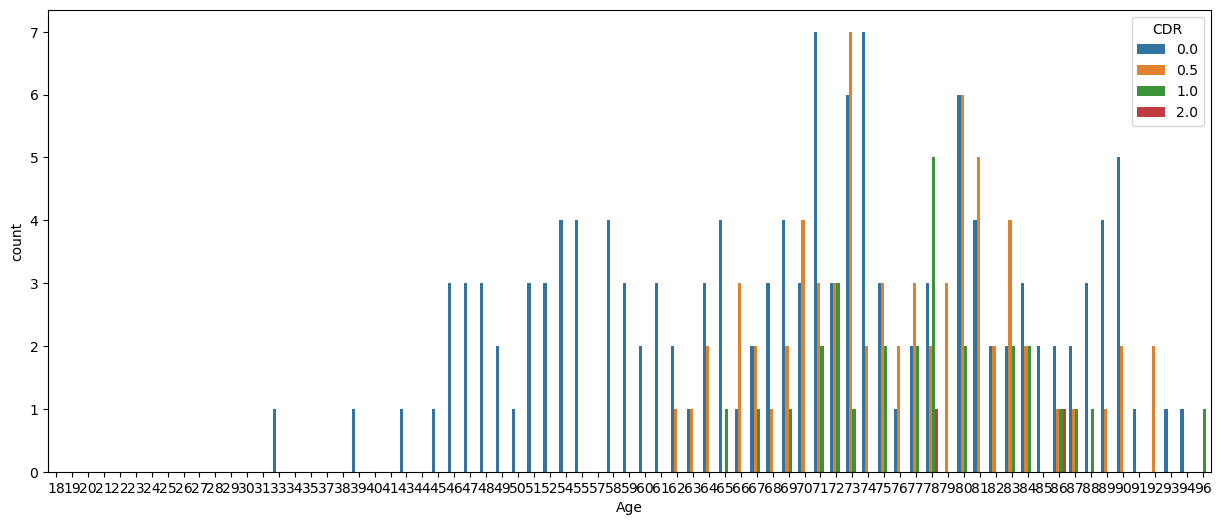

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(x ='Age',hue='CDR',data = c)

<Axes: xlabel='M/F', ylabel='count'>

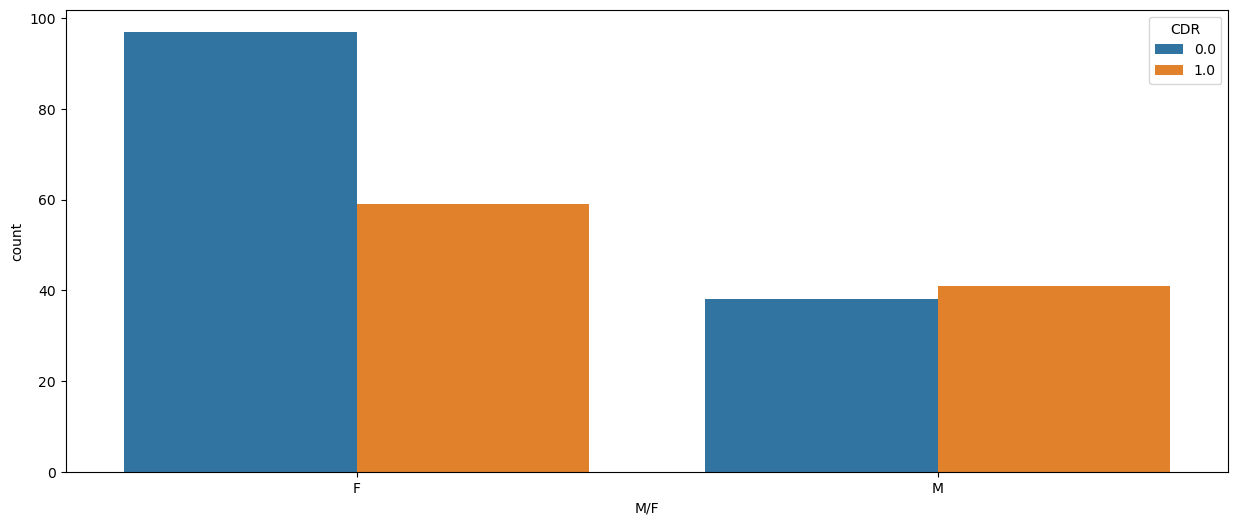

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(x ='M/F',hue='CDR',data = ccdr_cleaned)

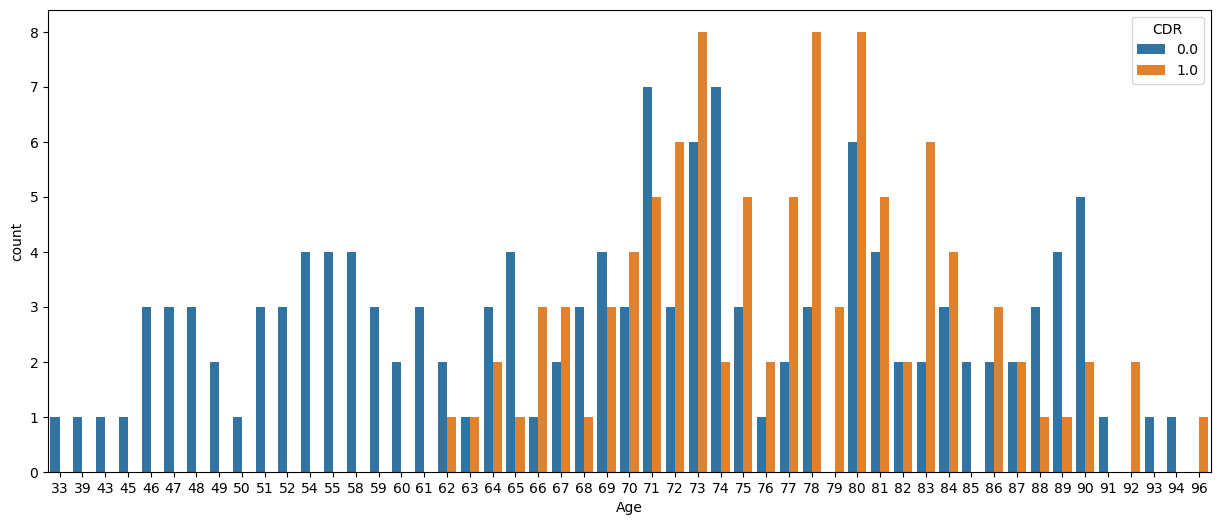

In [47]:
plt.figure(figsize=(15,6))
sns.countplot(x ='Age',hue='CDR',data = ccdr_cleaned)
plt.savefig('CCDR.png', dpi=300)

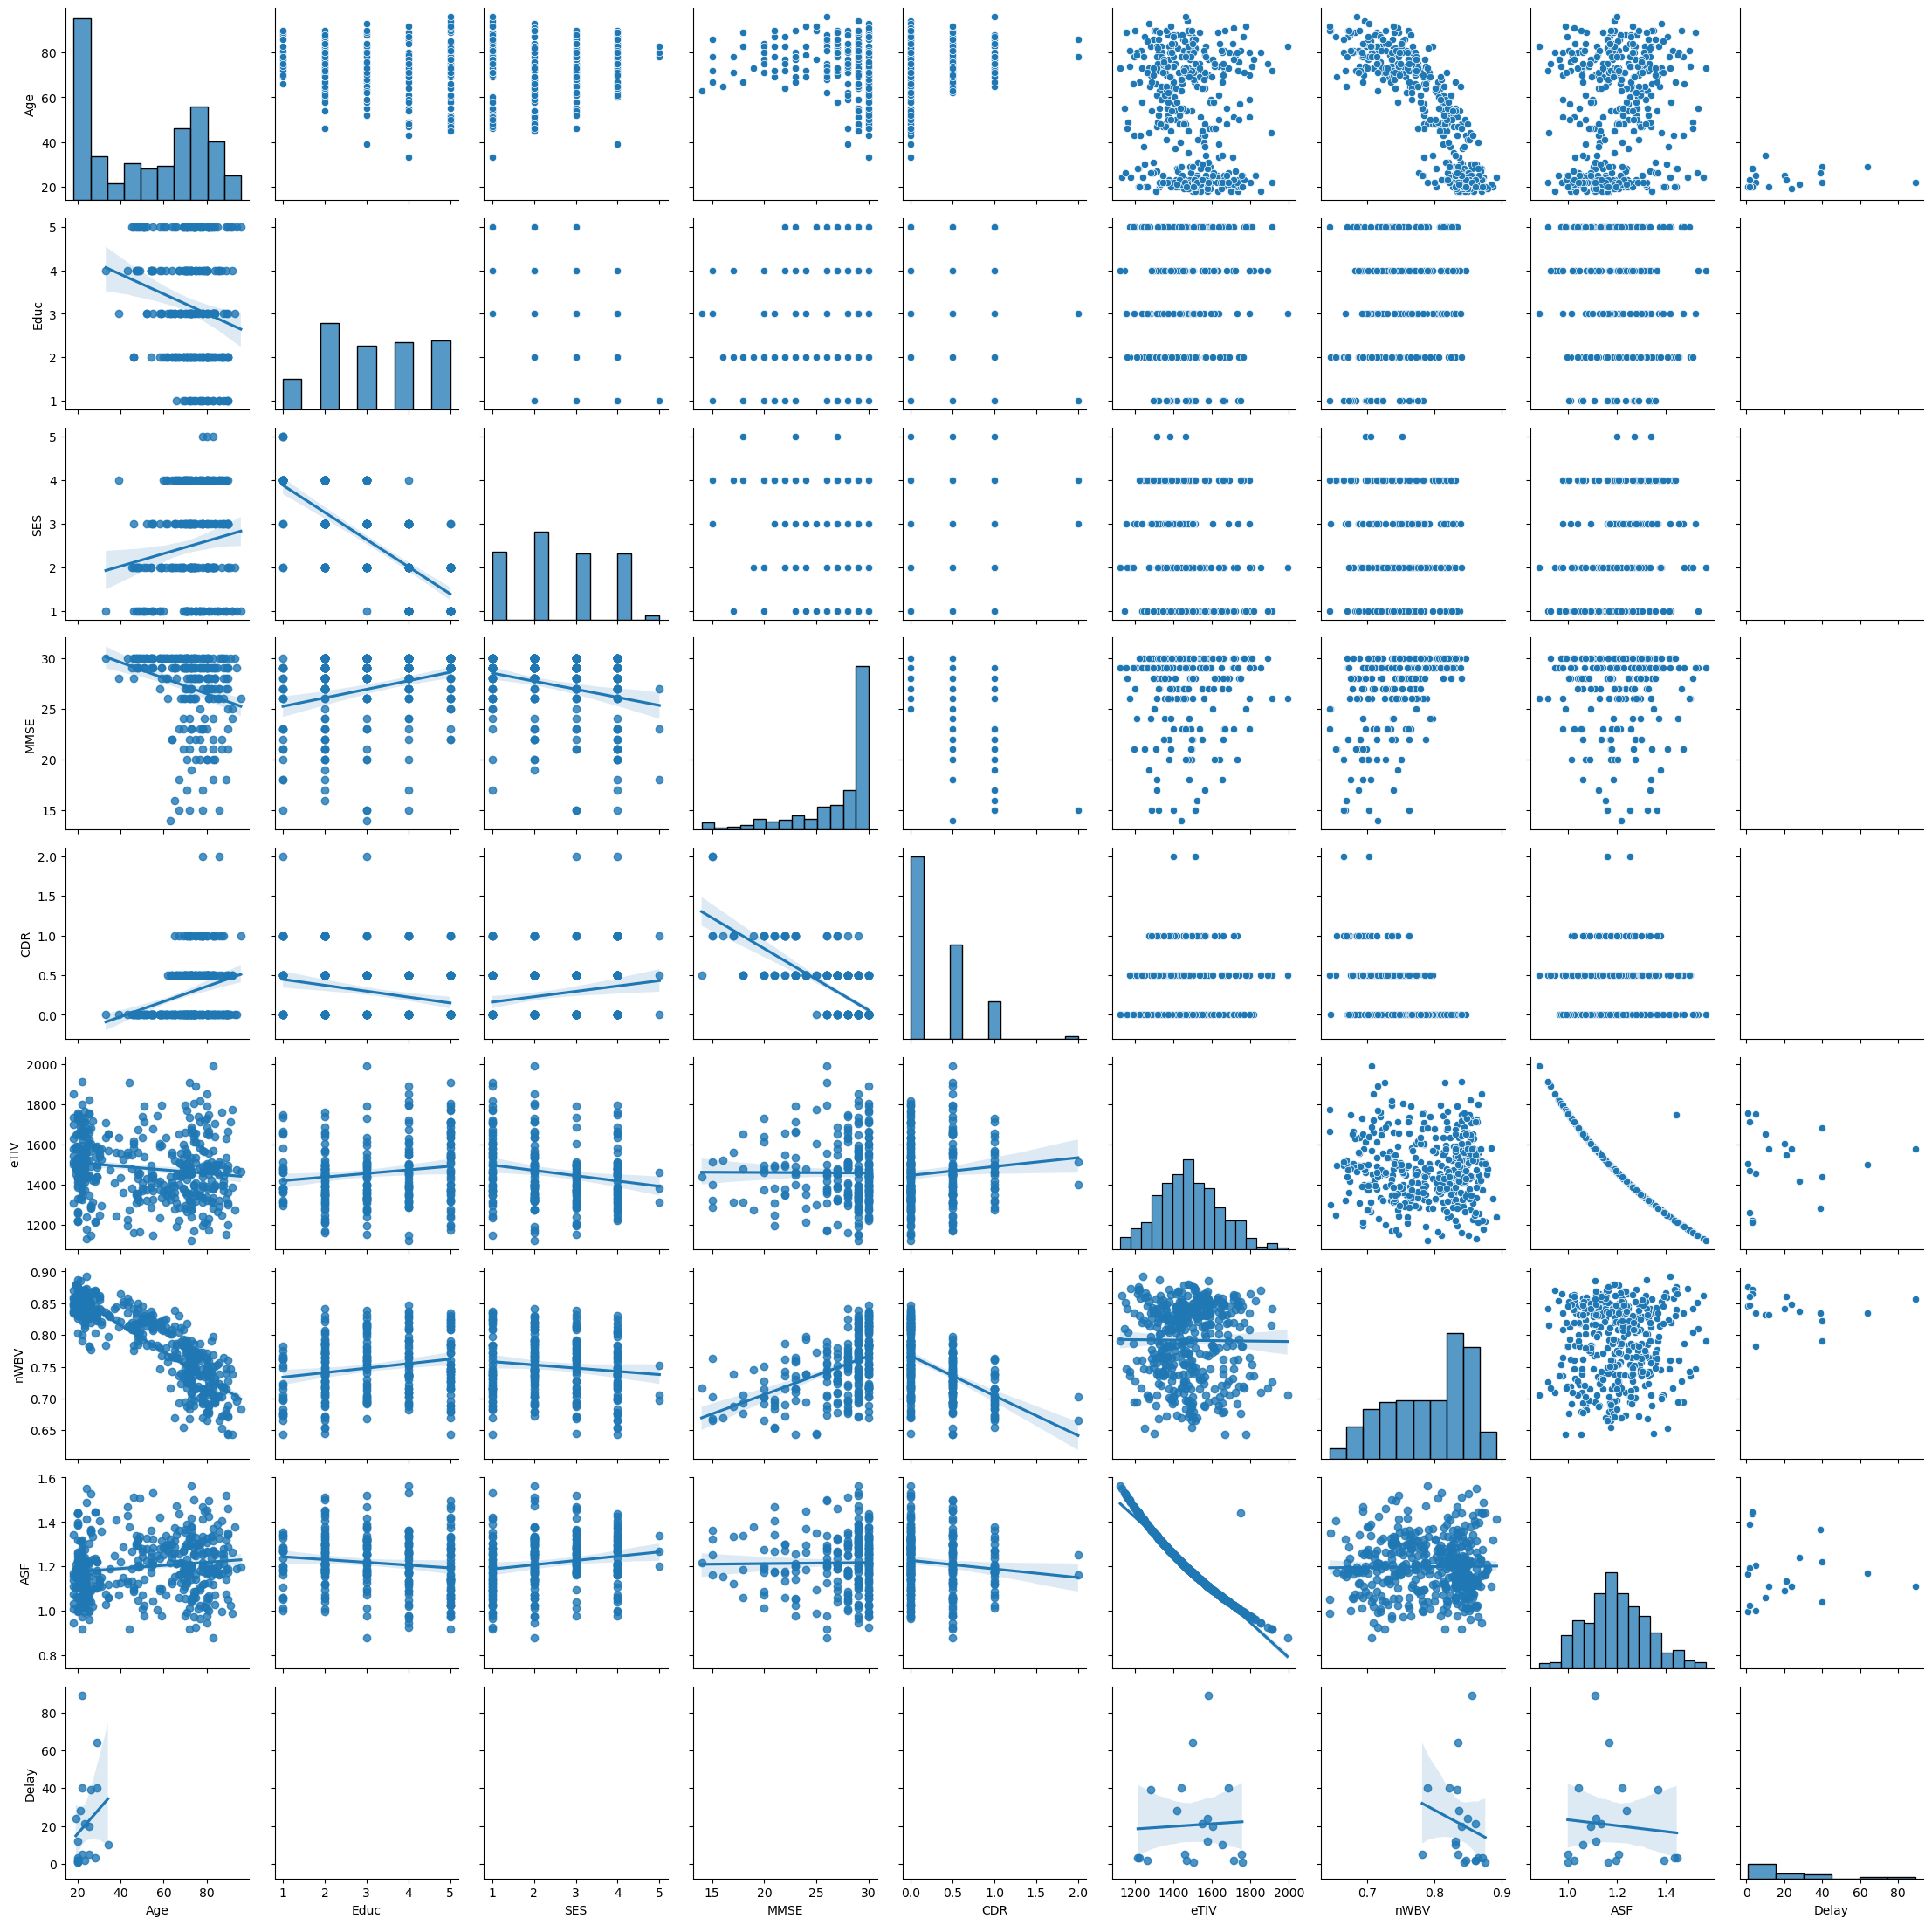

In [48]:
g=sns.PairGrid(c)
g.map_lower(sns.regplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
plt.savefig("pairplot.png", dpi=300)
plt.show()

In [50]:

from sklearn.preprocessing import StandardScaler
from sklearn.impute  import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

print("Highest age is ", np.max([np.max(c.Age), np.max(l.Age)]), "and lowest age is ", np.min([np.min(c.Age), np.min(l.Age)]))

Highest age is  98 and lowest age is  18


In [51]:
print(l[l["Group"] == "Demented"]["CDR"].unique())
print(l[l["Group"] == "Nondemented"]["CDR"].unique())
print(l[l["Group"] == "Converted"]["CDR"].unique())

[0.5 1.  0.  2. ]
[0.  0.5]
[]


In [52]:
# setting the Group column based on domain knowledge

group_map = {0:"Nondemented", 1:"Demented", 2:"Demented"}
c['Group'] = c['CDR'].map(group_map)

c.Group.value_counts()

Nondemented    135
Demented        30
Name: Group, dtype: int64

In [53]:
c.dropna(subset=['Group'],inplace=True)
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 415
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      165 non-null    object 
 1   M/F     165 non-null    object 
 2   Hand    165 non-null    object 
 3   Age     165 non-null    int64  
 4   Educ    165 non-null    float64
 5   SES     159 non-null    float64
 6   MMSE    165 non-null    float64
 7   CDR     165 non-null    float64
 8   eTIV    165 non-null    int64  
 9   nWBV    165 non-null    float64
 10  ASF     165 non-null    float64
 11  Delay   0 non-null      float64
 12  Group   165 non-null    object 
dtypes: float64(7), int64(2), object(4)
memory usage: 18.0+ KB


In [59]:
data = pd.concat([c,l])
data.rename(columns={"M/F" : "Gender"}, inplace=True)
# reset data index
data = data.reset_index()

print(data.head(1))
data.info()

   index Gender Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0      0      F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   

         Group  
0  Nondemented  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   538 non-null    int64  
 1   Gender  538 non-null    object 
 2   Hand    538 non-null    object 
 3   Age     538 non-null    int64  
 4   Educ    538 non-null    float64
 5   SES     513 non-null    float64
 6   MMSE    536 non-null    float64
 7   CDR     538 non-null    float64
 8   eTIV    538 non-null    int64  
 9   nWBV    538 non-null    float64
 10  ASF     538 non-null    float64
 11  Group   538 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 50.6+ KB


In [60]:
# confirming Hand column countains only one unique value

print(data.Hand.value_counts())
data.Group.value_counts()

R    538
Name: Hand, dtype: int64


Nondemented    325
Demented       213
Name: Group, dtype: int64

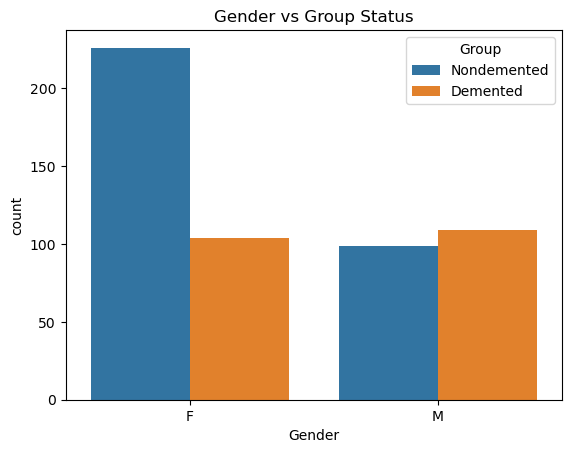

In [61]:
working = data

sns.countplot(x="Gender", data=working, hue="Group")
plt.title("Gender vs Group Status")
plt.show()
# more men are demented than women

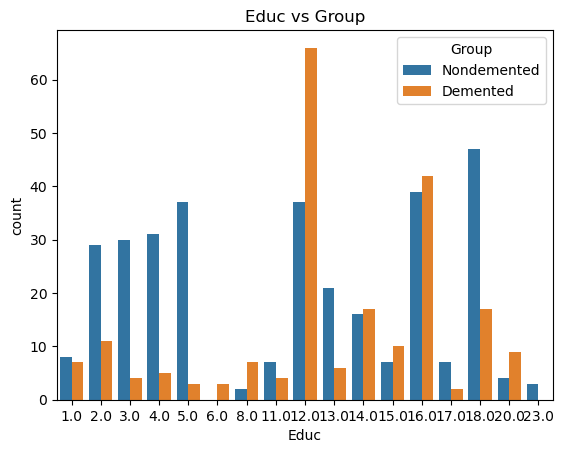

In [62]:
sns.countplot(x="Educ", hue="Group", data=working)
plt.title("Educ vs Group")
plt.show()

<Axes: xlabel='Group', ylabel='count'>

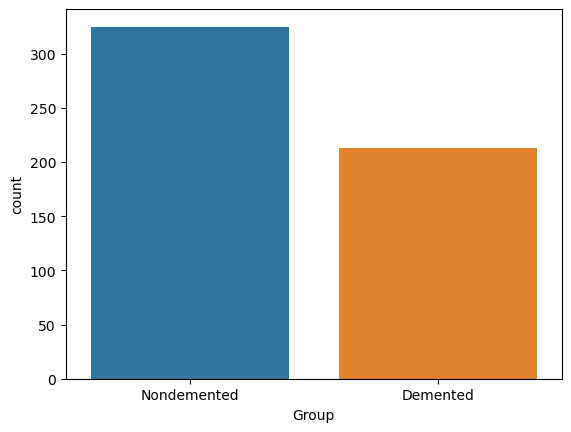

In [63]:
sns.countplot(x="Group", data=working)

# shows there are more nondemented in the dataset

<Axes: xlabel='Group', ylabel='CDR'>

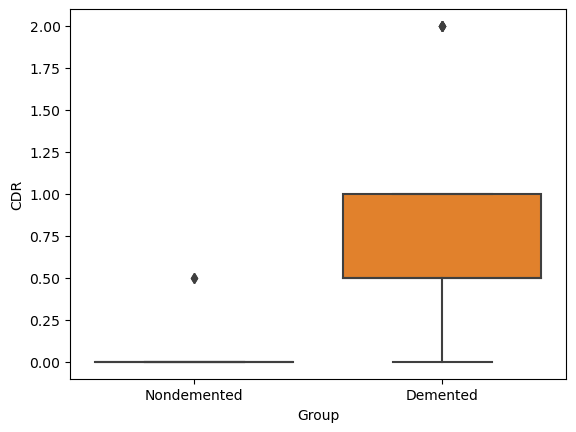

In [64]:
sns.boxplot(x='Group', y="CDR", data=working)
# values of Group based on CDR

In [65]:
# imputing wth the most occurrance
imputer = SimpleImputer ( missing_values = np.nan,strategy='most_frequent')

imputer.fit(data[['SES']])
data[['SES']] = imputer.fit_transform(data[['SES']])

# imputing with the median
imputer = SimpleImputer ( missing_values = np.nan,strategy='median')

imputer.fit(data[['MMSE']])
data[['MMSE']] = imputer.fit_transform(data[['MMSE']])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   538 non-null    int64  
 1   Gender  538 non-null    object 
 2   Hand    538 non-null    object 
 3   Age     538 non-null    int64  
 4   Educ    538 non-null    float64
 5   SES     538 non-null    float64
 6   MMSE    538 non-null    float64
 7   CDR     538 non-null    float64
 8   eTIV    538 non-null    int64  
 9   nWBV    538 non-null    float64
 10  ASF     538 non-null    float64
 11  Group   538 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 50.6+ KB


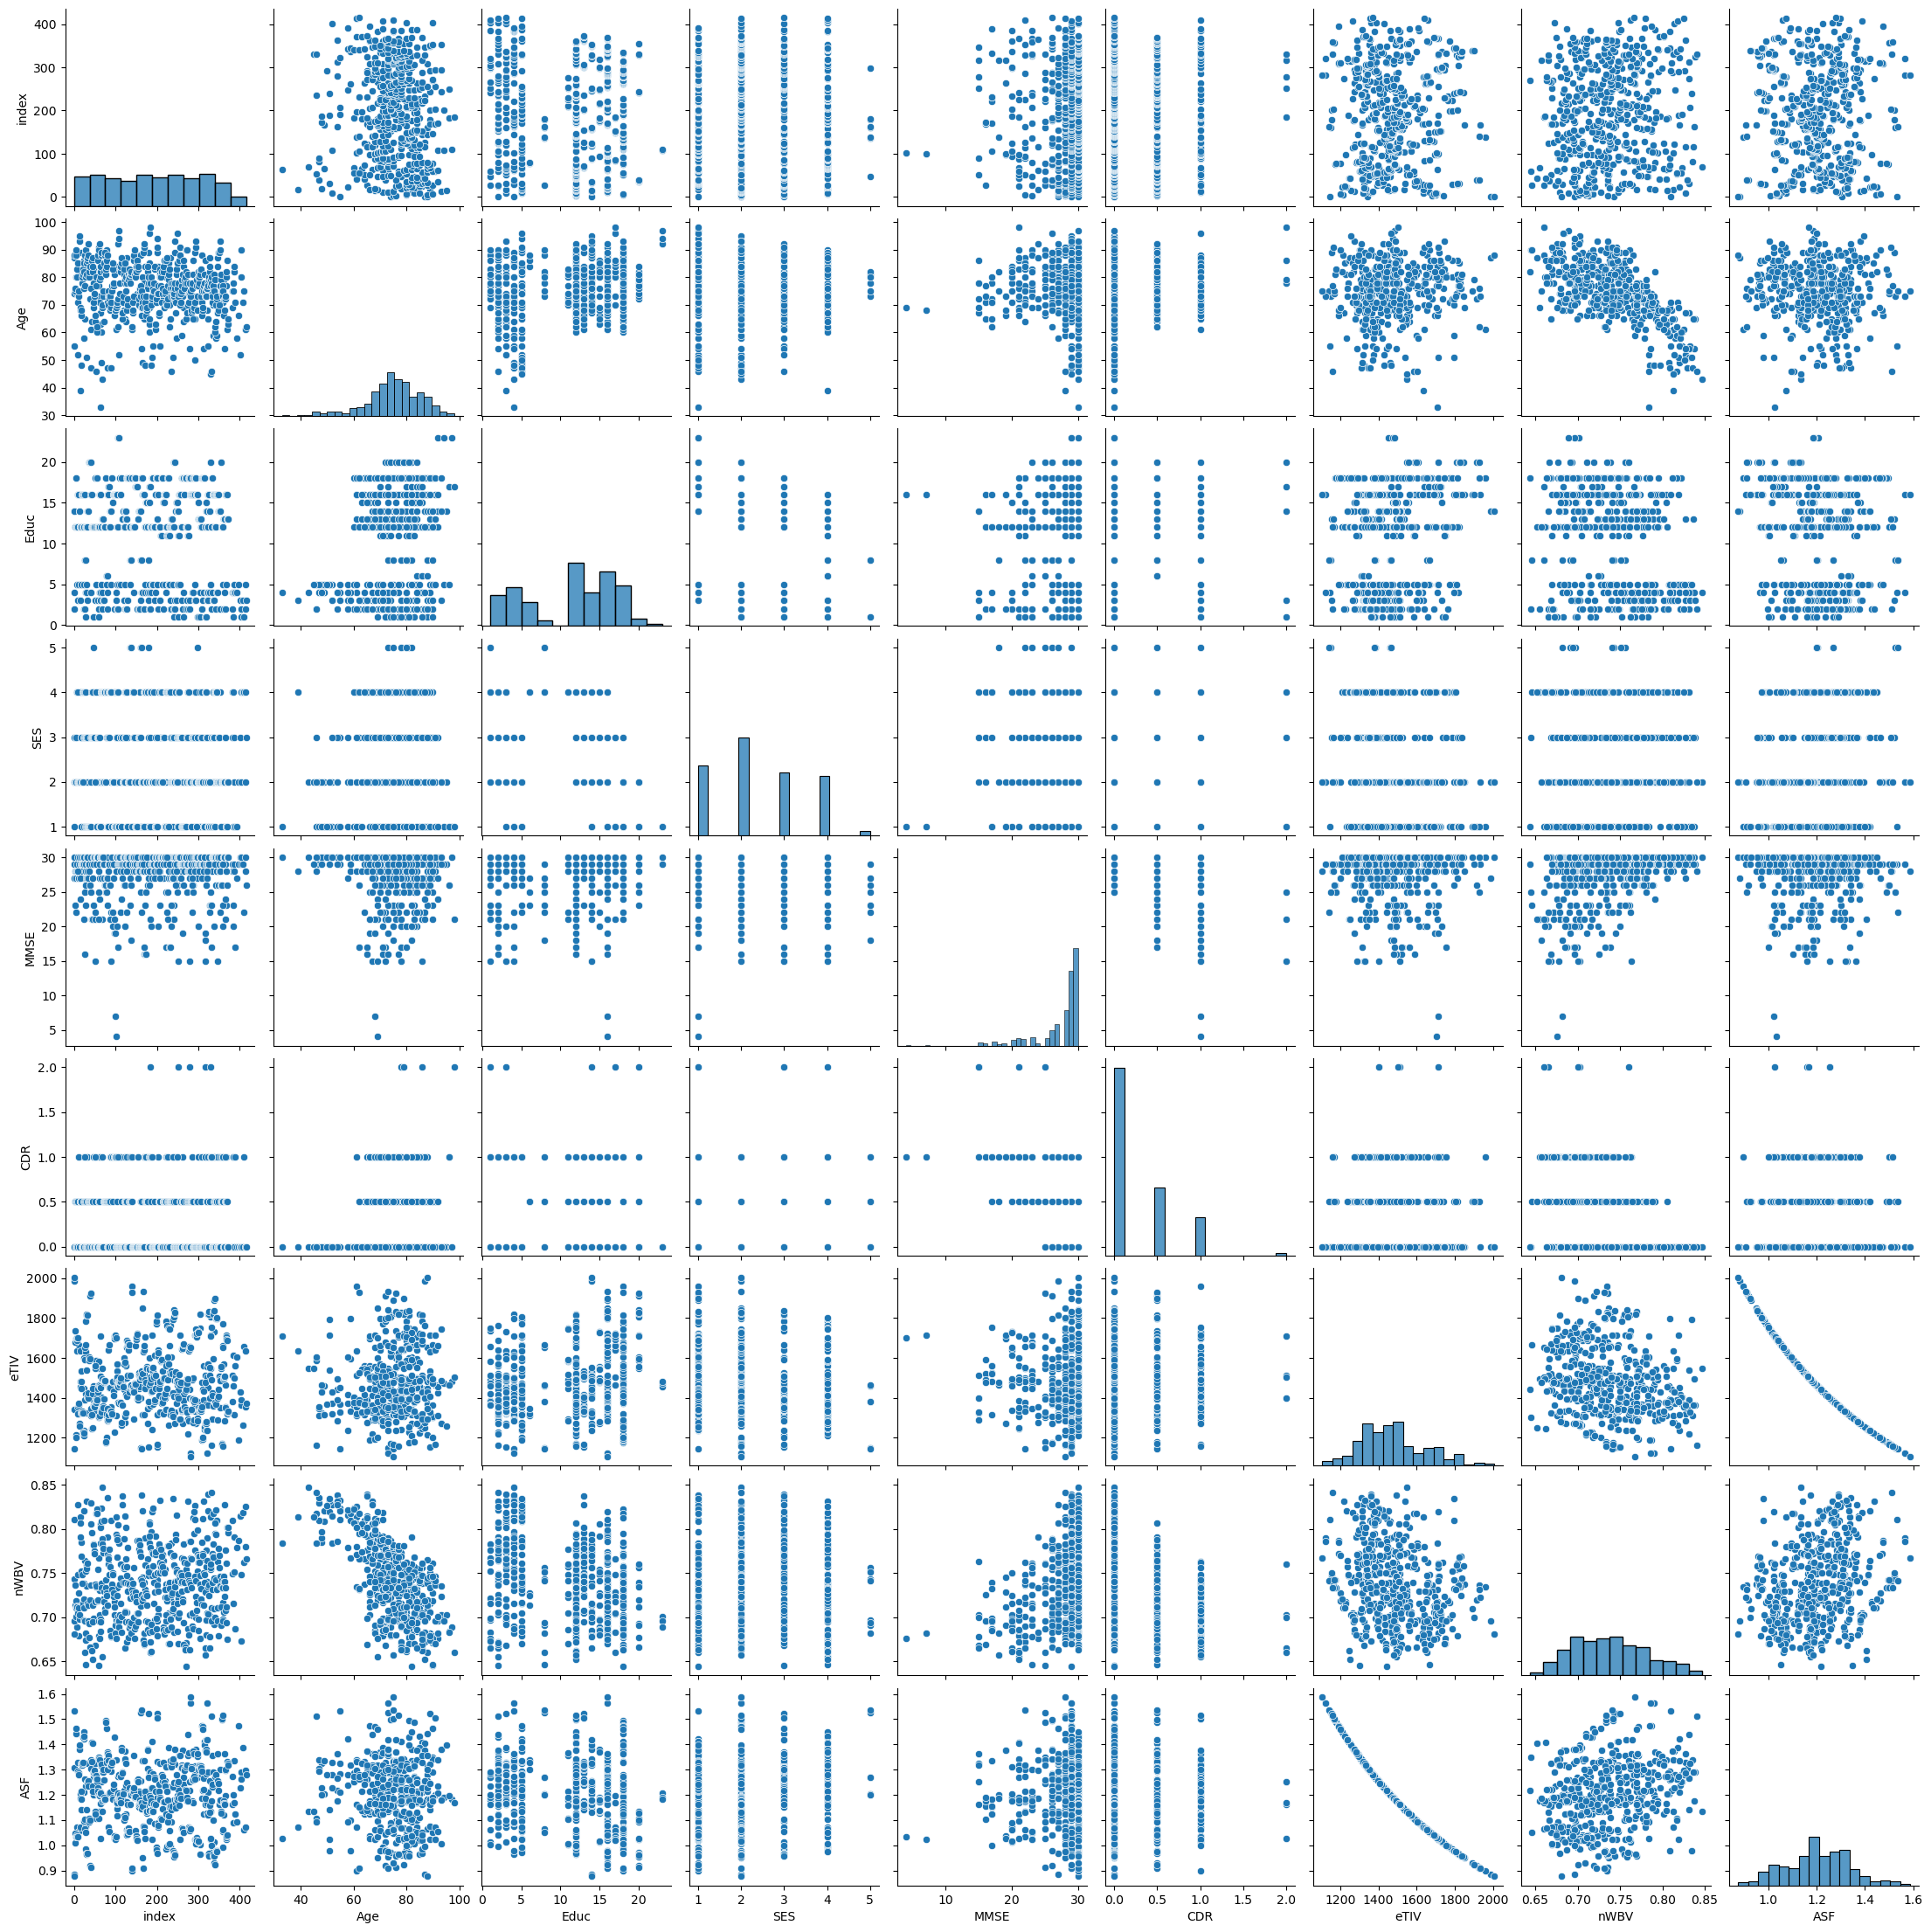

In [66]:
# using pairplot to visualise each feature against every other feature
sns.pairplot(data)

In [67]:
# converting categorical features to numerical values

data["Gender"] = np.where(data["Gender"] == 'F', 1, 0)
data["Hand"] = np.where(data["Hand"] == 'R', 1, 0)
data["Group"] = np.where(data["Group"] == 'Demented', 1, 0)

<Axes: >

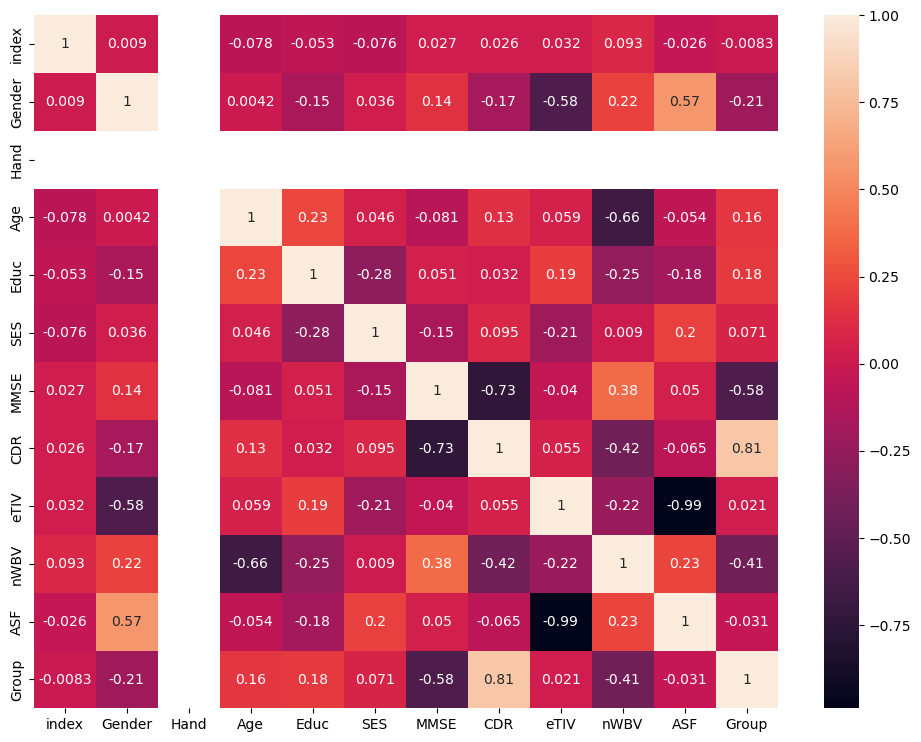

In [68]:
cor = data.corr()
plt.figure(figsize=(12,9))
# checking if the features are correlated or not using seaborn heatmap
sns.heatmap(cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values, annot=True)

In [69]:
# dropping extra features
data.drop(columns=["Hand", "CDR"], inplace=True)

In [70]:
# dividing data into descriptive and target features
y = data.pop('Group')
data.pop("index")
x = data

# since the ranges of the descriptive features are different we normalize them


x = StandardScaler().fit_transform(x)

In [71]:
# spliting the data into test and train datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0,test_size=0.2)

In [73]:
# Model selection

model = LogisticRegression()
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()
model3 = SVC()


model.fit(x_train, y_train)
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

SVC()

C:\Users\goutham\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


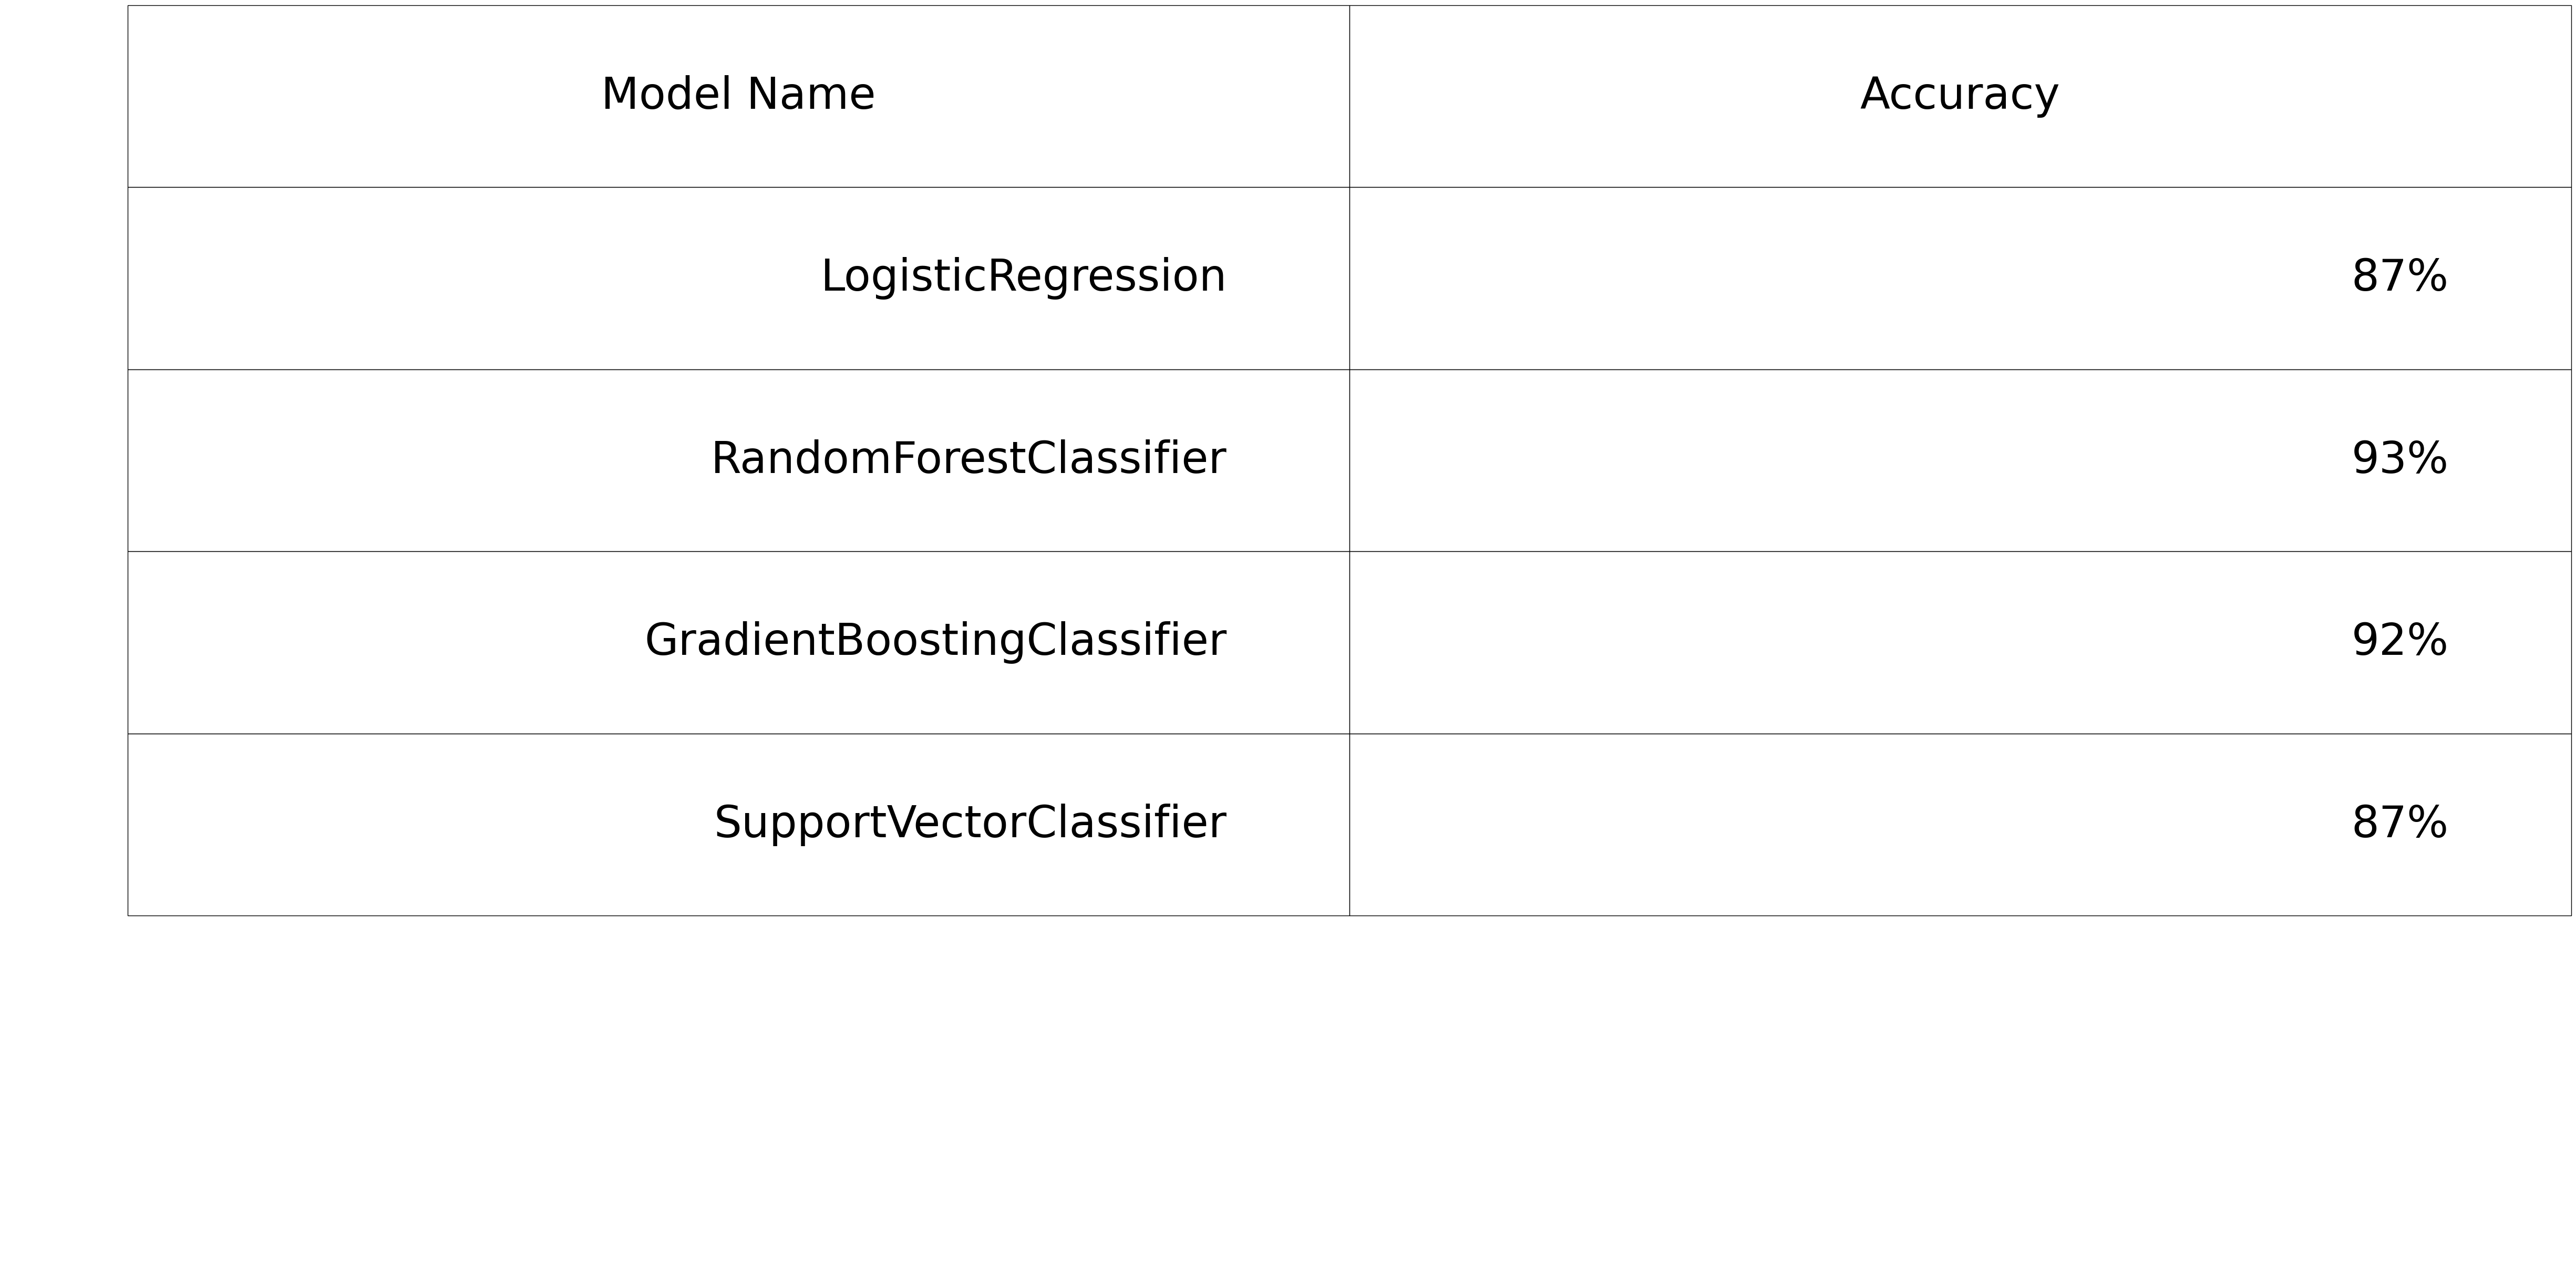

In [74]:
table = [
    [ "LogisticRegression","{:.0%}".format(model.score(x_test, y_test))],
    ["RandomForestClassifier", "{:.0%}".format(model1.score(x_test, y_test))],
    ["GradientBoostingClassifier", "{:.0%}".format(model2.score(x_test, y_test))],
    ["SupportVectorClassifier", "{:.0%}".format(model3.score(x_test, y_test))],
]
plt.rcParams["figure.figsize"] = [15.00, 15.0]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

columns = ("Model Name", "Accuracy")
ax.axis('tight')
ax.axis('off')
tab = ax.table(cellText=table, colLabels=columns, loc=4, bbox=(0.2,0.6,4,1.5))
tab.auto_set_font_size(False)
tab.set_fontsize(60)
plt.show()

# The best is RandomForestClassifier


In [75]:
# comparing predicted with actual value
pred = model1.predict(x_test)

comp = pd.DataFrame({"Real": y_test, "Predicted": pred})
print(comp)

     Real  Predicted
172     0          0
468     0          0
196     0          0
416     1          1
534     1          1
..    ...        ...
493     1          1
225     1          1
336     1          1
443     0          1
10      0          0

[108 rows x 2 columns]
